In [1]:
# data prepare
import trimesh

faces_list = [
    '../../static/example/face1.obj',
    '../../static/example/face2.obj',
    '../../static/example/face3.obj',
    '../../static/example/face4.obj',
]

def load_mesh(path: str) -> trimesh.Trimesh:
    _msh = trimesh.load_mesh(path)
    _msh.fill_holes()
    _msh.remove_duplicate_faces()
    return _msh

tooth_meshes = [
    load_mesh(_face) for _face in faces_list
]

In [2]:
# convert unsmesh to strmesh for face-1
import sys 
sys.path.append("../../libs")
from uns2str import Uns2Str

str_mesh_f1 = Uns2Str().convert(tooth_meshes[0])
tooth_meshes[0] = str_mesh_f1

In [3]:
# compute nearest dist for vertices in face1
import numpy as np

def compute_nearest(tidx: int) -> np.array:
    template_vts = tooth_meshes[0].vertices
    _shape = int(np.sqrt(len(template_vts)))
    ndists = tooth_meshes[tidx].nearest.signed_distance(template_vts)
    ndists = np.absolute(ndists).reshape(_shape, _shape)
    return ndists

f2_ndists = compute_nearest(1)
f3_ndists = compute_nearest(2)
f4_ndists = compute_nearest(3)

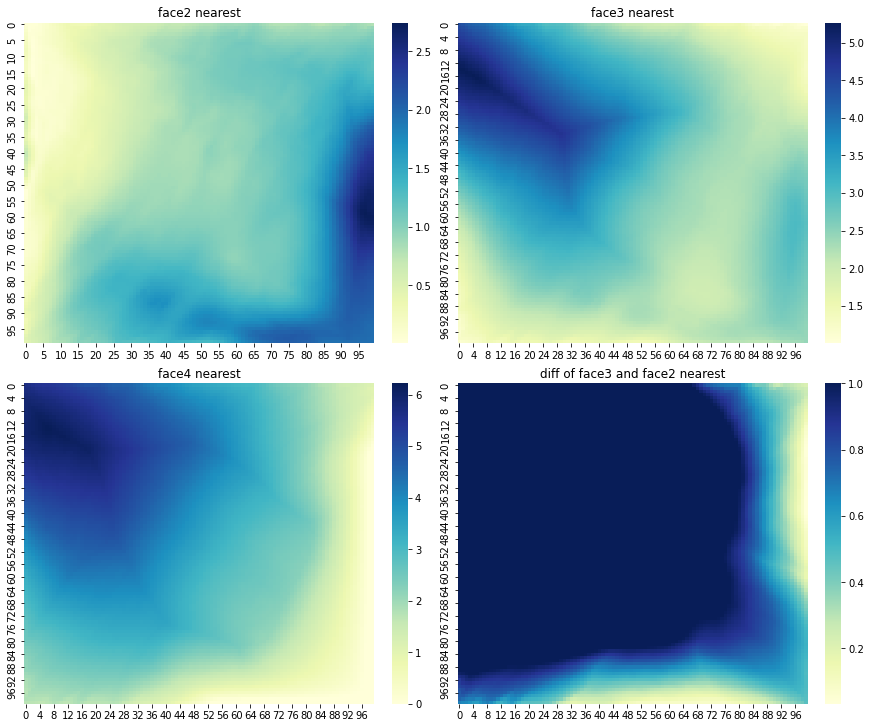

In [32]:
# show heatmap
import seaborn as sns
import matplotlib.pylab as plt

fig, ax =plt.subplots(2, 2, constrained_layout=True, figsize=(12, 10))

ax_sub = sns.heatmap(f2_ndists, cmap="YlGnBu", ax=ax[0][0])
ax_sub.set_title('face2 nearest')

ax_sub = sns.heatmap(f3_ndists, cmap="YlGnBu", ax=ax[0][1])
ax_sub.set_title('face3 nearest')

ax_sub = sns.heatmap(f4_ndists, cmap="YlGnBu", ax=ax[1][0])
ax_sub.set_title('face4 nearest')

ax_sub = sns.heatmap(f3_ndists - f2_ndists, cmap="YlGnBu", ax=ax[1][1], vmax=1.0)
ax_sub.set_title('diff of face3 and face2 nearest')

plt.show()

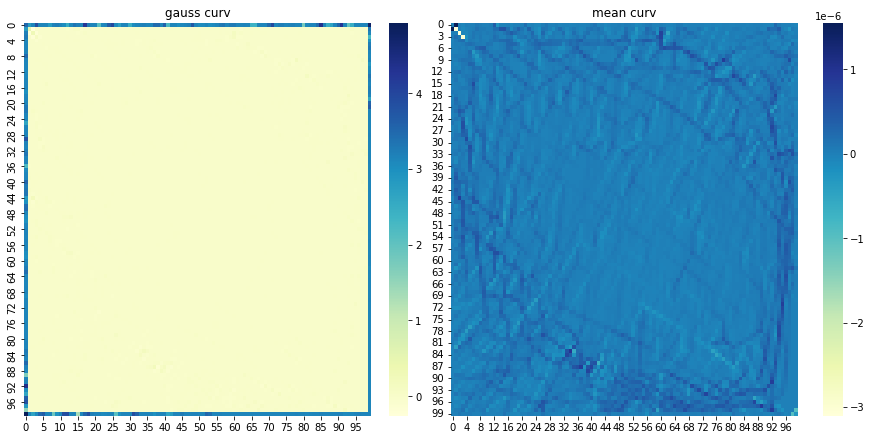

In [35]:
from trimesh.curvature import discrete_gaussian_curvature_measure, discrete_mean_curvature_measure

# msh must be structured mesh
def display_curv_heatmap(msh: trimesh.Trimesh):
    _scale = int(len(msh.vertices) ** 0.5)
    curvs = {
        'gauss curv': discrete_gaussian_curvature_measure(msh, msh.vertices, 1e-6),
        'mean curv': discrete_mean_curvature_measure(msh, msh.vertices, 1e-6)
    }

    fig, ax =plt.subplots(1, 2, constrained_layout=True, figsize=(12, 6))

    for idx, _name in enumerate(curvs.keys()):
        _val = curvs[_name].reshape(_scale, _scale)
        ax_sub = sns.heatmap(_val, cmap="YlGnBu", ax=ax[idx])
        ax_sub.set_title(_name)

    plt.show()

display_curv_heatmap(str_mesh_f1)